In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño




Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 6.1 Diferenciación numérica

### 6.1.1 Explicación

El principio de la diferenciación numérica está basado en la aproximación de funciones mediante Series de Taylor:

$$f(x) = f(a) + f^{\prime}(a)(x-a) + \frac{f^{\prime\prime}(a)}{2!}(x-a)^2$$


Para una función dada, $f(x)$, el valor de la función en los puntos $x_{i-1}, x_{i+1}$ se puede aproximar mediante series de Taylor truncadas:


$$f(x_{i+1}) = f(x_i) + f^{\prime}(x_i) h + \frac{f^{\prime\prime}(x_i)}{2}h^2$$

$$f(x_{i-1}) = f(x_i) - f^{\prime}(x_i) h + \frac{f^{\prime\prime}(x_i)}{2}h^2$$

<center>

<img src="figures/images/finiteDifferenceStencil.png" style="height:300px" title="Finite difference stencil">

***Figura 01. Esquema auxiliar para representación del mallado para diferencias finitas.***

</center>

Efectuando operaciones algebráicas, las ecuaciones mostradas arriba se pueden utilizar para obtener aproximaciones para las derivadas de la función $f(x)$:

**Aproximaciones para la primera derivada:**

- Diferencia progresiva:

$$f^{\prime}(x_i) = \frac{f(x_{i+1}) - f(x_i)}{h}$$

- Diferencia regresiva:

$$f^{\prime}(x_i) = \frac{f(x_i) - f(x_{i-1})}{h}$$

- Diferencia central:

$$f^{\prime}(x_i) = \frac{f(x_{i+1}) - f(x_{i-1})}{2h}$$

**Aproximaciones para la segunda derivada:**

- Diferencia central:

$$f^{\prime\prime}(x_i) = \frac{f(x_{i-1}) + f(x_{i+1}) - 2 f(x_i)}{h^2}$$

Existen aproximaciones de orden superior, que no se muestran en este documento.

### 6.1.2 Ejemplos

#### 6.1.2.1 Aplicación de las aproximaciones

Estimar el valor numérico de la derivada de la función

$$F(x) = -0.1 x^4 - 0.15 x^3 - 0.5 x^2 - 0.25 x + 1.2$$

en $x=0.5$, utilizando diferencias finitas, con un tamaño de paso $h=0.25$.

**Solución:**

$$\begin{matrix} x_{i-1} & = & 0.25 & \quad & f(x_{i-1}) & = & 1.103516 \\ x_{i} & = & 0.5 & \quad & f(x_{i}) & = & 0.925 \\ x_{i+1} & = & 0.75 & \quad & f(x_{i+1}) &= & 0.6363281\end{matrix}$$

In [2]:
def f(x):
    return -0.1*x**4 -0.15*x**3 - 0.5*x**2 - 0.25*x + 1.2

def df(x):
    return -0.4*x**3 - 0.45*x**2 -1.0*x -0.25

In [11]:
p = 0.5
h = 0.25
x = np.array([p-h, p, p+h])
fx = f(x)

# solución analítica
print(f"analytic: f'({p}) = {df(p)}")
# diferencia hacia adelante
print(f"forward: f'({p}) = {(fx[2] - fx[1])/h}")

# diferencia hacia atras
print(f"backward: f'({p}) = {(fx[1] - fx[0])/h}")

# diferencia centrada
print(f"central: f'({p}) = {(fx[2] - fx[0])/(2*h)}")

analytic: f'(0.5) = -0.9125
forward: f'(0.5) = -1.1546875
backward: f'(0.5) = -0.7140625000000003
central: f'(0.5) = -0.9343750000000002


#### 6.1.2.2 Cálculo con funciones de la librería `scipy`

In [4]:
from scipy.differentiate import derivative

In [5]:
help(derivative)

Help on function derivative in module scipy.differentiate._differentiate:

derivative(f, x, *, args=(), tolerances=None, maxiter=10, order=8, initial_step=0.5, step_factor=2.0, step_direction=0, preserve_shape=False, callback=None)
    Evaluate the derivative of a elementwise, real scalar function numerically.
    
    For each element of the output of `f`, `derivative` approximates the first
    derivative of `f` at the corresponding element of `x` using finite difference
    differentiation.
    
    This function works elementwise when `x`, `step_direction`, and `args` contain
    (broadcastable) arrays.
    
    Parameters
    ----------
    f : callable
        The function whose derivative is desired. The signature must be::
    
            f(xi: ndarray, *argsi) -> ndarray
    
        where each element of ``xi`` is a finite real number and ``argsi`` is a tuple,
        which may contain an arbitrary number of arrays that are broadcastable with
        ``xi``. `f` must be an e

In [6]:
# diferencia hacia adelante
derivative(f, 0.5)

     success: True
      status: 0
          df: -0.9125000000000014
       error: 3.552713678800501e-15
         nit: 2
        nfev: 11
           x: 0.5

#### 6.1.2.3 Cálculo de la derivada sobre un rango con funciones de la librería `scipy` y `numpy`

In [7]:
def g(x):
    return np.sin((np.exp(-x**(-2))))

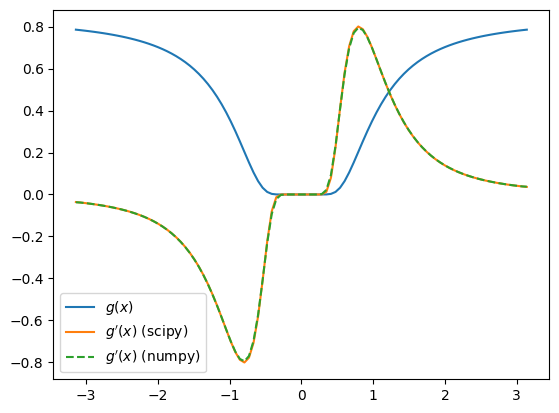

In [8]:
fig, ax = plt.subplots()
x = np.linspace(-np.pi, np.pi, 100)

gx = g(x)
gpx = derivative(g, x) # scipy
ggx = np.gradient(gx, x) # numpy

ax.plot(x, gx, label=r'$g(x)$')
ax.plot(x, gpx.df, label='$g^{\prime}(x)$ (scipy)')
ax.plot(x, ggx, ls='--', label='$g^{\prime}(x)$ (numpy)')
ax.legend()
plt.show()